# FSL Feat 3

In [18]:
import glob, os, re
import time
import subprocess as sp
import multiprocessing as mp
import subprocess
import pandas as pd
import shutil
from nilearn.plotting import plot_stat_map, plot_anat, plot_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import interactive
plt.rcParams["figure.figsize"] = (40,20)


In [19]:
feats=glob.glob("/projects/niblab/experiments/bbx/data/preprocessed/subs_trimmed/sub-*/%s/fsl_feat2/*task-training_19contrasts.gfeat/cope%s.feat"%('ses-2',"1"))
len(feats)
print([x.split("/")[-5] for x in feats ])

['sub-006', 'sub-008', 'sub-014', 'sub-015', 'sub-017', 'sub-021', 'sub-023', 'sub-025', 'sub-033', 'sub-037', 'sub-039', 'sub-041', 'sub-042', 'sub-043', 'sub-045', 'sub-050', 'sub-051', 'sub-052', 'sub-053', 'sub-063', 'sub-065', 'sub-067', 'sub-068', 'sub-070', 'sub-071', 'sub-072', 'sub-078', 'sub-079', 'sub-083', 'sub-084', 'sub-086', 'sub-087', 'sub-088', 'sub-089', 'sub-093', 'sub-096', 'sub-097', 'sub-099', 'sub-100', 'sub-102', 'sub-103', 'sub-109', 'sub-114', 'sub-115', 'sub-116', 'sub-119', 'sub-120', 'sub-124', 'sub-130', 'sub-134', 'sub-135', 'sub-138', 'sub-144', 'sub-149', 'sub-152', 'sub-153', 'sub-154', 'sub-160', 'sub-162', 'sub-163', 'sub-170', 'sub-005', 'sub-007', 'sub-009', 'sub-010', 'sub-019', 'sub-024', 'sub-030', 'sub-032', 'sub-036', 'sub-044', 'sub-046', 'sub-054', 'sub-055', 'sub-057', 'sub-075', 'sub-082', 'sub-090', 'sub-092', 'sub-098', 'sub-104', 'sub-107', 'sub-111', 'sub-117', 'sub-121', 'sub-123', 'sub-128', 'sub-129', 'sub-136', 'sub-137', 'sub-142'

In [20]:
x=['sub-006', 'sub-008', 'sub-014', 'sub-015', 'sub-017', 'sub-021', 'sub-023', 'sub-025', 'sub-033', 'sub-037', 'sub-039', 'sub-041', 'sub-042', 'sub-043', 'sub-045', 'sub-050', 'sub-051', 'sub-052', 'sub-053', 'sub-063', 'sub-065', 'sub-067', 'sub-068', 'sub-070', 'sub-071', 'sub-072', 'sub-078', 'sub-079', 'sub-083', 'sub-084', 'sub-086', 'sub-087', 'sub-088', 'sub-089', 'sub-093', 'sub-096', 'sub-097', 'sub-099', 'sub-100', 'sub-102', 'sub-103', 'sub-109', 'sub-114', 'sub-115', 'sub-116', 'sub-119', 'sub-120', 'sub-124', 'sub-130', 'sub-134', 'sub-135', 'sub-138', 'sub-144', 'sub-149', 'sub-152', 'sub-153', 'sub-154', 'sub-160', 'sub-162', 'sub-163', 'sub-170', 'sub-005', 'sub-007', 'sub-009', 'sub-010', 'sub-019', 'sub-024', 'sub-030', 'sub-032', 'sub-036', 'sub-044', 'sub-046', 'sub-054', 'sub-055', 'sub-057', 'sub-075', 'sub-082', 'sub-090', 'sub-092', 'sub-098', 'sub-104', 'sub-107', 'sub-111', 'sub-117', 'sub-121', 'sub-123', 'sub-128', 'sub-129', 'sub-136', 'sub-137', 'sub-142', 'sub-143', 'sub-145', 'sub-168', 'sub-001', 'sub-020', 'sub-022', 'sub-028', 'sub-031', 'sub-034', 'sub-038', 'sub-040', 'sub-066', 'sub-095', 'sub-112', 'sub-131', 'sub-132', 'sub-141', 'sub-156', 'sub-166', 'sub-004', 'sub-058', 'sub-061', 'sub-062', 'sub-073', 'sub-085', 'sub-118', 'sub-146', 'sub-148', 'sub-159', 'sub-161', 'sub-048', 'sub-002', 'sub-011', 'sub-013', 'sub-035', 'sub-077', 'sub-080', 'sub-074', 'sub-127']

In [21]:
x.sort
print(x)

['sub-006', 'sub-008', 'sub-014', 'sub-015', 'sub-017', 'sub-021', 'sub-023', 'sub-025', 'sub-033', 'sub-037', 'sub-039', 'sub-041', 'sub-042', 'sub-043', 'sub-045', 'sub-050', 'sub-051', 'sub-052', 'sub-053', 'sub-063', 'sub-065', 'sub-067', 'sub-068', 'sub-070', 'sub-071', 'sub-072', 'sub-078', 'sub-079', 'sub-083', 'sub-084', 'sub-086', 'sub-087', 'sub-088', 'sub-089', 'sub-093', 'sub-096', 'sub-097', 'sub-099', 'sub-100', 'sub-102', 'sub-103', 'sub-109', 'sub-114', 'sub-115', 'sub-116', 'sub-119', 'sub-120', 'sub-124', 'sub-130', 'sub-134', 'sub-135', 'sub-138', 'sub-144', 'sub-149', 'sub-152', 'sub-153', 'sub-154', 'sub-160', 'sub-162', 'sub-163', 'sub-170', 'sub-005', 'sub-007', 'sub-009', 'sub-010', 'sub-019', 'sub-024', 'sub-030', 'sub-032', 'sub-036', 'sub-044', 'sub-046', 'sub-054', 'sub-055', 'sub-057', 'sub-075', 'sub-082', 'sub-090', 'sub-092', 'sub-098', 'sub-104', 'sub-107', 'sub-111', 'sub-117', 'sub-121', 'sub-123', 'sub-128', 'sub-129', 'sub-136', 'sub-137', 'sub-142'

In [22]:
def model3_setup(num_of_copes, num_of_input, template_file, deriv_dir,
                 preproc_folder, outdir,mask, ses):
    
    
    drop=[ 'sub-052', 'sub-057', 'sub-091', 'sub-127', 'sub-128',  'sub-157',
      'sub-164', 'sub-168', 'sub-169', 'sub-170']
    
    mask=mask
    # loop through copes and make design file for each
    
    for cope_num in range(1, num_of_copes+1):
        cope_num
        session = 'ses-1'        

        #OUTPUTDIR = os.path.join(deriv_dir, 'group_ana/cope%s_ses-1'%cope_num)
        OUTPUTDIR = os.path.join(outdir, 'c%s_%s_task-training_n%s'%(cope_num, ses, str(num_of_input)))
        
        # grab the feat folders
        feats=glob.glob("/projects/niblab/experiments/bbx/data/preprocessed/subs_trimmed/sub-*/%s/fsl_feat2/*task-training_19contrasts.gfeat/cope%s.feat"%(ses,cope_num))
        if ses == 'ses-1':
            feats=[x for x in feats if x.split("/")[-5] not in drop ]#and  x.split("/")[-5] not in all_bad]
            
        #print(len(feats))
        feats=[x for x in feats]
        feats.sort()
        
        
        folders=[]
        i=1
        for x in feats:
            string_temp='set feat_files(%s) "%s"'%(i, x)
            i+=1
            folders.append(string_temp)

            
        string1='\n'.join(folders)
        #print(string1)
                    
        OUTFILE_PATH = os.path.join(outdir, 'c%s_%s_%s_n%s.fsf'%(cope_num, ses, 'task-training', str(num_of_input)))
        print(OUTFILE_PATH)
        
        # open and fill template file
        with open(template_file, 'r') as infile:
            tempfsf=infile.read()
            
            # fill files
            tempfsf = tempfsf.replace("OUTFOLDER", OUTPUTDIR)
            tempfsf = tempfsf.replace("DATASET", string1)
            tempfsf = tempfsf.replace("MASK", mask)
            
            #print(tempfsf)
            with open(OUTFILE_PATH, 'w') as outfile:
                #print("[INFO] Writing output file: ", OUTFILE_PATH)
                outfile.write(tempfsf)
            outfile.close()
        infile.close()
    print("[INFO] Complete. ")

In [6]:
def model3_main():
    # SET OUR RELEVANT PATHS
    deriv_dir = "/projects/niblab/experiments/bbx/data/preprocessed"
    preproc_folder='/projects/niblab/experiments/bbx/data/preprocessed/subs_trimmed'
    template_file = os.path.join(
    '/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/model3.fsf')
    outdir='/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results'
    mask='/projects/niblab/experiments/bbx/data/masks/BBX_GM152asym_mask_3x3x3_final_V3.nii.gz'
    ses='ses-2'
    #  get the number of cope files to make (# of copes)
    num_of_copes = 19
    num_of_input = 130
    #cope_dict = {}
    model3_setup(num_of_copes, num_of_input, template_file, 
                 deriv_dir, preproc_folder,outdir, mask, ses)

In [7]:
model3_main()

/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results/c1_ses-2_task-training_n130.fsf
/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results/c2_ses-2_task-training_n130.fsf
/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results/c3_ses-2_task-training_n130.fsf
/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results/c4_ses-2_task-training_n130.fsf
/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results/c5_ses-2_task-training_n130.fsf
/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results/c6_ses-2_task-training_n130.fsf
/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results/c7_ses-2_task-training_n130.fsf
/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results/c8_ses-2_task-training_n130.fsf
/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_resul

---

Run Batches

In [8]:
design_files=glob.glob('/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results/c*n130.fsf')

In [10]:

#design_file="/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results/c10_task-training_n141.fsf"

for file in design_files[1:]:
    fslfeat_cmd=['feat', file,'&']
    sp.run(' '.join(fslfeat_cmd), shell=True) 
    print('[INFO] running model ', ' '.join(fslfeat_cmd))


[INFO] running model  feat /projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results/c2_ses-2_task-training_n130.fsf &
[INFO] running model  feat /projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results/c3_ses-2_task-training_n130.fsf &
[INFO] running model  feat /projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results/c4_ses-2_task-training_n130.fsf &
[INFO] running model  feat /projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results/c5_ses-2_task-training_n130.fsf &
[INFO] running model  feat /projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results/c6_ses-2_task-training_n130.fsf &
[INFO] running model  feat /projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results/c7_ses-2_task-training_n130.fsf &
[INFO] running model  feat /projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results/c8_ses-2_task-training_n13

---

In [ ]:
from shutil import copy2

In [ ]:
niftis=glob.glob("/projects/niblab/experiments/bbx/data/fsl_feat3/ses-1/GM_mask/c*.gfeat/cope1.feat/thresh_zstat1.nii.gz")

for nii in niftis:
    cope_id=nii.split("/")[-3].split("_")[0]
    newfile=cope_id+"_thresh_zstat1.nii.gz"
    newpath=os.path.join('/projects/niblab/experiments/bbx/data/fsl_feat3/ses-1_niftis',
                         newfile)
    print(newfile)
   
    copy2(nii, newpath)
print("[INFO] completed.") 


---

In [24]:
def plot_feat3(datapath, ses, n):
    
    filepath=os.path.join(datapath,
                        'c*n%s.gfeat/cope1.feat/stats/zstat1.nii.gz'%n)
    
    nrows=5
    ncols=4
    
    tmaps=glob.glob(filepath)
    tmaps=sorted(tmaps, key=lambda x: int(x.replace('/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/%s/may2021_results/c'%ses, '').replace('_%s_task-training_n%s.gfeat/cope1.feat/stats/zstat1.nii.gz'%(ses, n), '')))

    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,20))

    for midx, tmap in enumerate(tmaps):

        settings=axes[int(midx / ncols), int(midx % ncols)]

        cope=tmap.split("/")[-4].split("_")[0]

        title_str="ses-1 %s"%(cope)

        plotting.plot_glass_brain(tmap, colorbar=True, threshold=3.0, cmap='spring',
                          axes=settings, black_bg=False,
                          plot_abs=False, display_mode='xz', title=title_str) 

    fig.delaxes(axes[4][3])
    fig.suptitle('model 3 contrasts | BBX %s training tasks | n = %s'%(ses, n), fontsize=25)
    plotting.show

In [25]:

from nilearn import plotting
from scipy.stats import norm

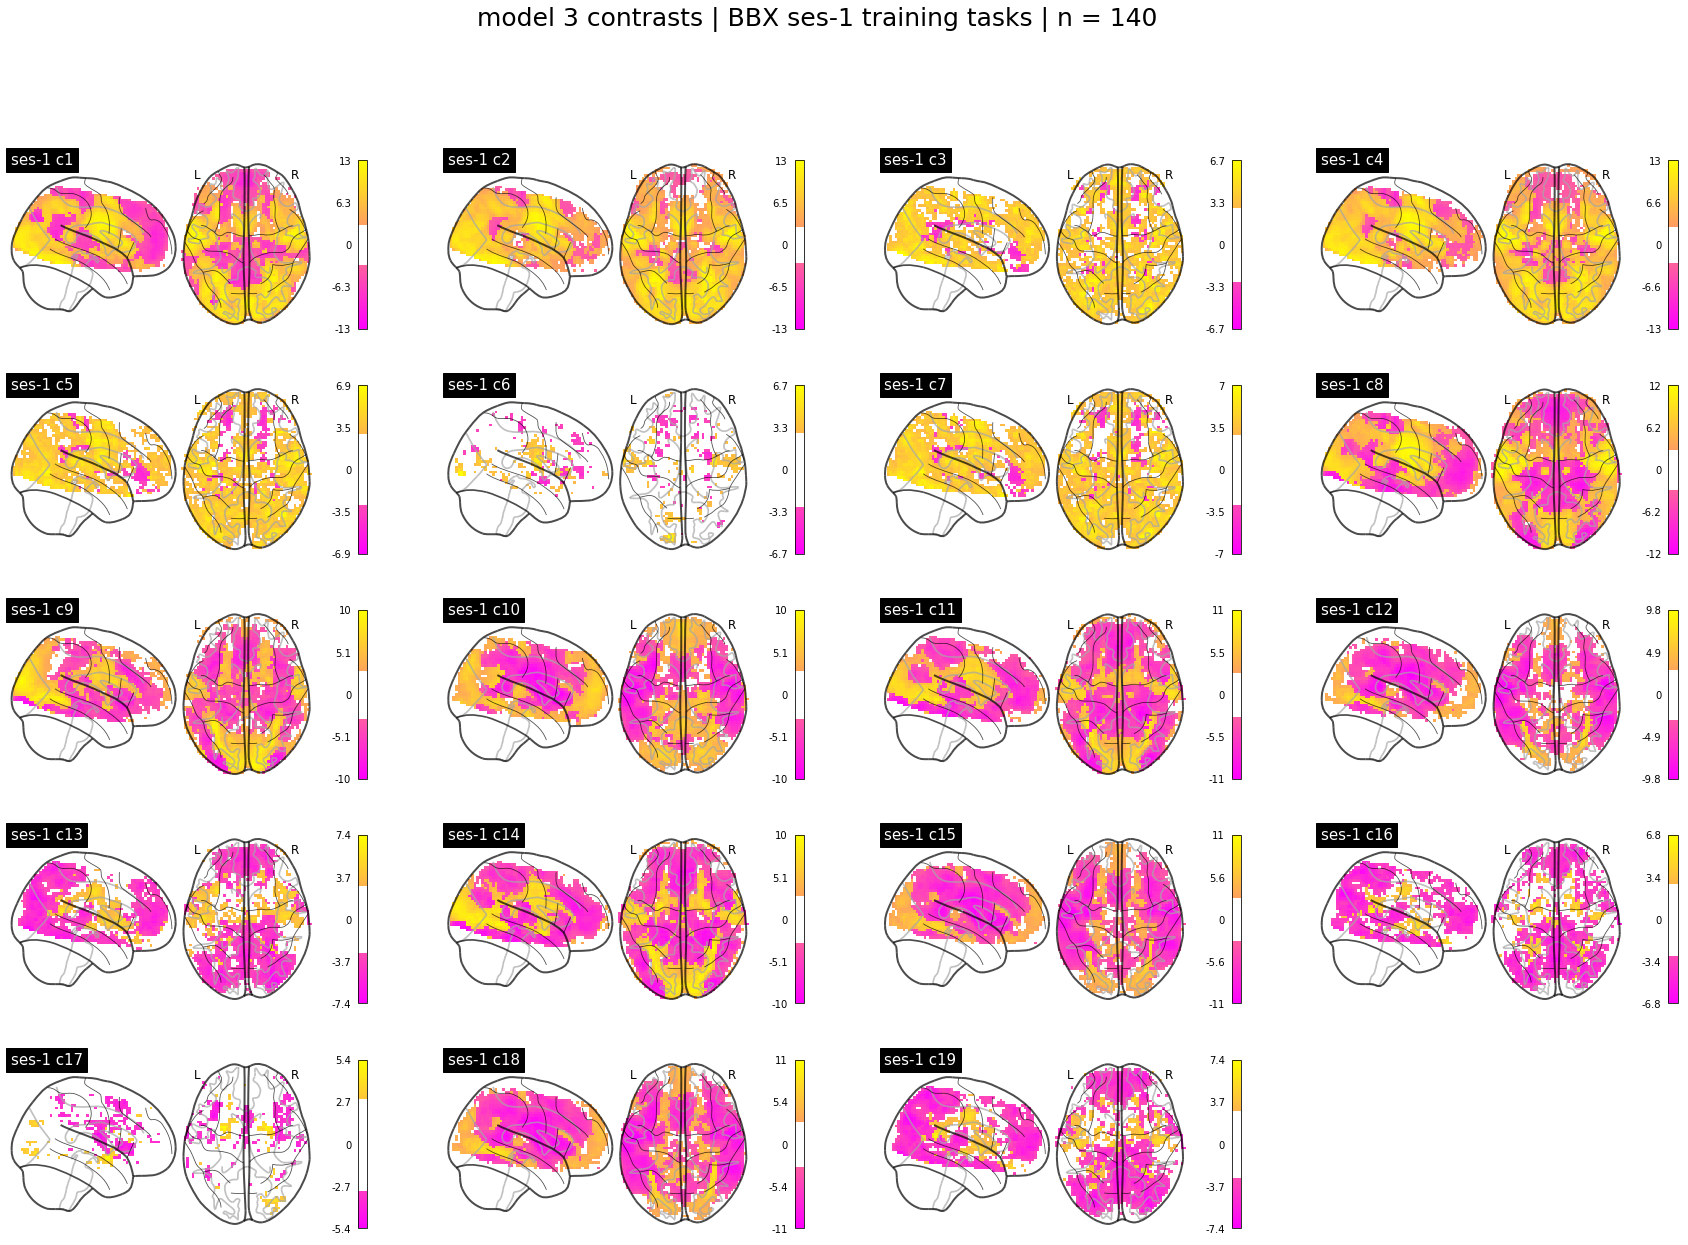

In [26]:
datapath='/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-1/may2021_results'

plot_feat3(datapath, 'ses-1', '140')



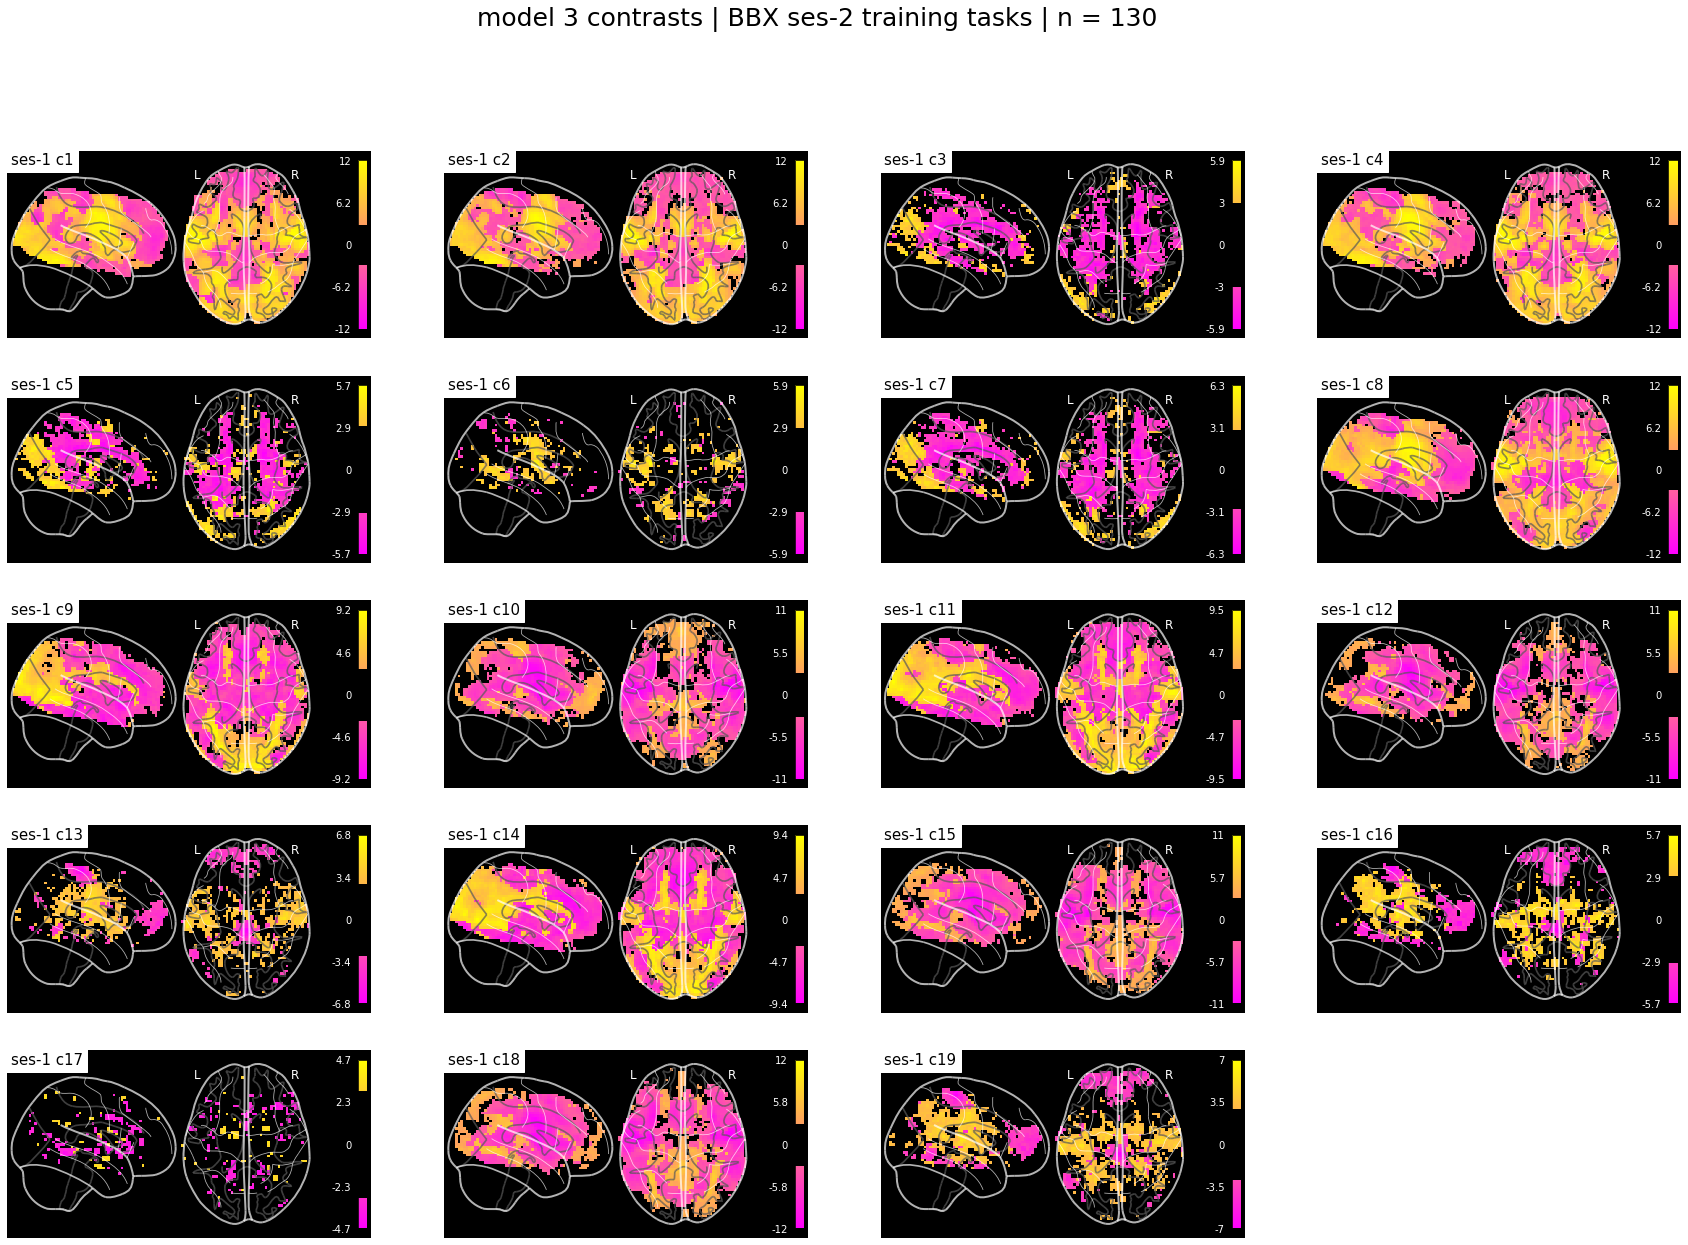

In [20]:
datapath='/projects/niblab/experiments/bbx/data/preprocessed/fsl_feat3/ses-2/may2021_results'

plot_feat3(datapath, 'ses-2', '130')


---

---